[View in Colaboratory](https://colab.research.google.com/github/aayushkumarjvs/deep-learning-with-python-notebooks/blob/master/3_6_classifying_newswires.ipynb)

In [1]:
#!/usr/bin/env python3 
!pip install -q keras   # This only required for Google's Colab
import keras
keras.__version__

Using TensorFlow backend.


'2.1.5'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
#each example is a list of integers
#which are also word indeces
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
#explained this concept in the prior notebook,plese refer that if this not understood
#the split techniques are quite import so do not skip understanding this part
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 1us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [0]:
# Training data
x_train = vectorize_sequences(train_data)
# Test data
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


In [0]:
# Vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Validating our method down
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [0]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/50
7982/7982 [==============================] - 1s 152us/step - loss: 1.8327 - acc: 0.5993 - val_loss: 1.2674 - val_acc: 0.7230
Epoch 2/50
7982/7982 [==============================] - 1s 148us/step - loss: 0.9979 - acc: 0.7813 - val_loss: 1.0244 - val_acc: 0.7840
Epoch 3/50
7982/7982 [==============================] - 1s 167us/step - loss: 0.6780 - acc: 0.8492 - val_loss: 0.9553 - val_acc: 0.7910
Epoch 4/50
7982/7982 [==============================] - 1s 167us/step - loss: 0.4716 - acc: 0.8963 - val_loss: 0.8769 - val_acc: 0.8170
Epoch 5/50
7982/7982 [==============================] - 1s 168us/step - loss: 0.3360 - acc: 0.9247 - val_loss: 0.8632 - val_acc: 0.8280
Epoch 6/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.2611 - acc: 0.9400 - val_loss: 0.9529 - val_acc: 0.8090
Epoch 7/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.2126 - acc: 0.9473 - val_loss: 0.9428 - val_acc: 0.8220


7982/7982 [==============================] - 1s 168us/step - loss: 0.1841 - acc: 0.9526 - val_loss: 1.1827 - val_acc: 0.7650
Epoch 9/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.1611 - acc: 0.9545 - val_loss: 1.0149 - val_acc: 0.8110
Epoch 10/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.1482 - acc: 0.9555 - val_loss: 1.0959 - val_acc: 0.8020
Epoch 11/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.1429 - acc: 0.9555 - val_loss: 1.0654 - val_acc: 0.8160
Epoch 12/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.1335 - acc: 0.9558 - val_loss: 1.0594 - val_acc: 0.8100
Epoch 13/50
7982/7982 [==============================] - 1s 162us/step - loss: 0.1304 - acc: 0.9559 - val_loss: 1.1259 - val_acc: 0.8030
Epoch 14/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.1253 - acc: 0.9554 - val_loss: 1.0978 - val_acc: 0.8060
Epoch 15/50
7982/7982 [==============================]

7982/7982 [==============================] - 1s 163us/step - loss: 0.1176 - acc: 0.9572 - val_loss: 1.2137 - val_acc: 0.8000
Epoch 17/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.1137 - acc: 0.9589 - val_loss: 1.1924 - val_acc: 0.7910
Epoch 18/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.1130 - acc: 0.9570 - val_loss: 1.2109 - val_acc: 0.7990
Epoch 19/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.1107 - acc: 0.9582 - val_loss: 1.2539 - val_acc: 0.8020
Epoch 20/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.1034 - acc: 0.9590 - val_loss: 1.2062 - val_acc: 0.7930
Epoch 21/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.1045 - acc: 0.9572 - val_loss: 1.2567 - val_acc: 0.7930
Epoch 22/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.1033 - acc: 0.9563 - val_loss: 1.2524 - val_acc: 0.7920
Epoch 23/50
7982/7982 [==============================

Epoch 24/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.0987 - acc: 0.9568 - val_loss: 1.3369 - val_acc: 0.7820
Epoch 25/50
7982/7982 [==============================] - 1s 164us/step - loss: 0.0975 - acc: 0.9575 - val_loss: 1.3083 - val_acc: 0.7780
Epoch 26/50
7982/7982 [==============================] - 1s 164us/step - loss: 0.0921 - acc: 0.9592 - val_loss: 1.3203 - val_acc: 0.7870
Epoch 27/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.0942 - acc: 0.9580 - val_loss: 1.3312 - val_acc: 0.7870
Epoch 28/50
7982/7982 [==============================] - 1s 164us/step - loss: 0.0916 - acc: 0.9562 - val_loss: 1.3885 - val_acc: 0.7760
Epoch 29/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.0901 - acc: 0.9575 - val_loss: 1.3458 - val_acc: 0.7950
Epoch 30/50
7982/7982 [==============================] - 1s 164us/step - loss: 0.0889 - acc: 0.9565 - val_loss: 1.4853 - val_acc: 0.7810
Epoch 31/50
7424/7982 [==================

7982/7982 [==============================] - 1s 168us/step - loss: 0.0869 - acc: 0.9580 - val_loss: 1.3914 - val_acc: 0.7920
Epoch 32/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.0846 - acc: 0.9563 - val_loss: 1.4596 - val_acc: 0.7830
Epoch 33/50
7982/7982 [==============================] - 1s 167us/step - loss: 0.0842 - acc: 0.9584 - val_loss: 1.4679 - val_acc: 0.7910
Epoch 34/50
7982/7982 [==============================] - 1s 164us/step - loss: 0.0824 - acc: 0.9587 - val_loss: 1.4883 - val_acc: 0.7840
Epoch 35/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.0811 - acc: 0.9582 - val_loss: 1.5254 - val_acc: 0.7900
Epoch 36/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.0794 - acc: 0.9594 - val_loss: 1.5667 - val_acc: 0.7790
Epoch 37/50
7982/7982 [==============================] - 1s 170us/step - loss: 0.0815 - acc: 0.9589 - val_loss: 1.5710 - val_acc: 0.7800
Epoch 38/50
7982/7982 [==============================

7982/7982 [==============================] - 1s 166us/step - loss: 0.0759 - acc: 0.9590 - val_loss: 1.6319 - val_acc: 0.7800
Epoch 40/50
7982/7982 [==============================] - 1s 163us/step - loss: 0.0769 - acc: 0.9580 - val_loss: 1.6711 - val_acc: 0.7710
Epoch 41/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.0745 - acc: 0.9584 - val_loss: 1.6593 - val_acc: 0.7730
Epoch 42/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.0752 - acc: 0.9598 - val_loss: 1.6710 - val_acc: 0.7740
Epoch 43/50
7982/7982 [==============================] - 1s 161us/step - loss: 0.0729 - acc: 0.9584 - val_loss: 1.7395 - val_acc: 0.7760
Epoch 44/50
7982/7982 [==============================] - 1s 164us/step - loss: 0.0736 - acc: 0.9579 - val_loss: 1.7591 - val_acc: 0.7720
Epoch 45/50
7982/7982 [==============================] - 1s 163us/step - loss: 0.0716 - acc: 0.9592 - val_loss: 1.8074 - val_acc: 0.7710
Epoch 46/50
7808/7982 [============================>.

7982/7982 [==============================] - 1s 172us/step - loss: 0.0711 - acc: 0.9608 - val_loss: 1.7472 - val_acc: 0.7780
Epoch 47/50
7982/7982 [==============================] - 1s 163us/step - loss: 0.0701 - acc: 0.9577 - val_loss: 1.7508 - val_acc: 0.7690
Epoch 48/50
7982/7982 [==============================] - 1s 163us/step - loss: 0.0703 - acc: 0.9585 - val_loss: 1.8554 - val_acc: 0.7780
Epoch 49/50
7982/7982 [==============================] - 1s 163us/step - loss: 0.0696 - acc: 0.9588 - val_loss: 1.8330 - val_acc: 0.7710
Epoch 50/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.0681 - acc: 0.9607 - val_loss: 1.8246 - val_acc: 0.7700


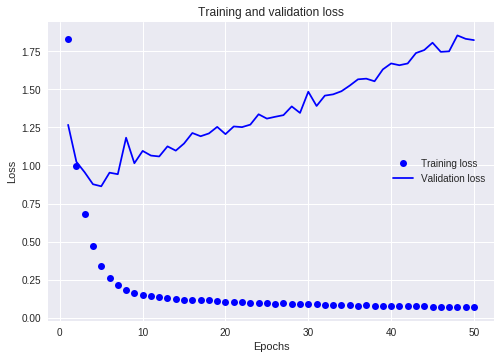

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

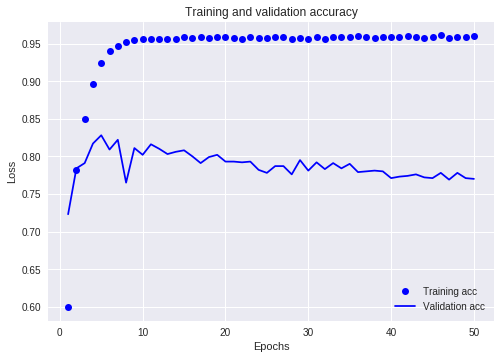

In [20]:
plt.clf()   # clf-clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 165us/step - loss: 1.7572 - acc: 0.6282 - val_loss: 1.2015 - val_acc: 0.7340
Epoch 2/10
7982/7982 [==============================] - 1s 142us/step - loss: 0.9382 - acc: 0.7927 - val_loss: 0.9895 - val_acc: 0.7890
Epoch 3/10
7982/7982 [==============================] - 1s 176us/step - loss: 0.6304 - acc: 0.8612 - val_loss: 0.9629 - val_acc: 0.7880
Epoch 4/10
7982/7982 [==============================] - 1s 183us/step - loss: 0.4366 - acc: 0.9050 - val_loss: 0.9340 - val_acc: 0.8070
Epoch 5/10
7982/7982 [==============================] - 1s 180us/step - loss: 0.3180 - acc: 0.9315 - val_loss: 0.8907 - val_acc: 0.8270
Epoch 6/10
7982/7982 [==============================] - 1s 173us/step - loss: 0.2466 - acc: 0.9399 - val_loss: 0.9219 - val_acc: 0.8180
Epoch 7/10
7982/7982 [==============================] - 1s 178us/step - loss: 0.2069 - acc: 0.9500 - val_loss: 0.9473 - val_acc: 0.8140


7982/7982 [==============================] - 1s 179us/step - loss: 0.1808 - acc: 0.9523 - val_loss: 1.0622 - val_acc: 0.8000
Epoch 9/10
7982/7982 [==============================] - 1s 178us/step - loss: 0.1637 - acc: 0.9538 - val_loss: 1.0966 - val_acc: 0.7980
Epoch 10/10
7982/7982 [==============================] - 1s 176us/step - loss: 0.1537 - acc: 0.9548 - val_loss: 1.0312 - val_acc: 0.8090


In [27]:
results = model.evaluate(x_test, one_hot_test_labels)


2246/2246 [==============================] - 0s 117us/step


In [28]:
results

[1.1318487624238882, 0.7894033837934105]

Our approach reaches an accuracy of ~79%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%, but in our case it is closer to 19%, so our results seem pretty good, at least when compared to a random baseline:

In [29]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18833481745325023

**GENERATING PREDICTIONS ON NEW DATA**

In [0]:
predictions = model.predict(x_test)

In [31]:
predictions[0].shape

(46,)

In [32]:
np.sum(predictions[0])

0.99999994

In [33]:
#Largest entry in a pre-trained class,that is class with heighest probal=bility
np.argmax(predictions[0])

3

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)


In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

*On the importance of having sufficiently large intermediate layers*
We mentioned earlier that since our final outputs were 46-dimensional, we should avoid intermediate layers with much less than 46 hidden units. Now let's try to see what happens when we introduce an information bottleneck by having intermediate layers significantly less than 46-dimensional, e.g. 4-dimensional.




In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=50,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/50
7982/7982 [==============================] - 2s 207us/step - loss: 2.7161 - acc: 0.3668 - val_loss: 2.0216 - val_acc: 0.5760
Epoch 2/50
7982/7982 [==============================] - 1s 164us/step - loss: 1.6867 - acc: 0.6357 - val_loss: 1.4812 - val_acc: 0.6640
Epoch 3/50
7982/7982 [==============================] - 1s 186us/step - loss: 1.2862 - acc: 0.6982 - val_loss: 1.3193 - val_acc: 0.7080
Epoch 4/50
7982/7982 [==============================] - 1s 182us/step - loss: 1.0939 - acc: 0.7488 - val_loss: 1.2916 - val_acc: 0.7090
Epoch 5/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.9637 - acc: 0.7771 - val_loss: 1.2279 - val_acc: 0.7230
Epoch 6/50
7982/7982 [==============================] - 1s 170us/step - loss: 0.8656 - acc: 0.7937 - val_loss: 1.2309 - val_acc: 0.7310
Epoch 7/50
7982/7982 [==============================] - 1s 169us/step - loss: 0.7882 - acc: 0.8047 - val_loss: 1.2367 - val_acc: 0.7270


7982/7982 [==============================] - 1s 168us/step - loss: 0.7252 - acc: 0.8153 - val_loss: 1.2371 - val_acc: 0.7290
Epoch 9/50
7982/7982 [==============================] - 1s 167us/step - loss: 0.6726 - acc: 0.8220 - val_loss: 1.2682 - val_acc: 0.7280
Epoch 10/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.6276 - acc: 0.8262 - val_loss: 1.2807 - val_acc: 0.7260
Epoch 11/50
7982/7982 [==============================] - 1s 170us/step - loss: 0.5865 - acc: 0.8355 - val_loss: 1.3057 - val_acc: 0.7240
Epoch 12/50
7982/7982 [==============================] - 1s 173us/step - loss: 0.5520 - acc: 0.8448 - val_loss: 1.3393 - val_acc: 0.7310
Epoch 13/50
7982/7982 [==============================] - 1s 168us/step - loss: 0.5190 - acc: 0.8559 - val_loss: 1.3782 - val_acc: 0.7280
Epoch 14/50
7982/7982 [==============================] - 1s 178us/step - loss: 0.4914 - acc: 0.8651 - val_loss: 1.4428 - val_acc: 0.7160
Epoch 15/50
7982/7982 [==============================]

Epoch 16/50
7982/7982 [==============================] - 2s 191us/step - loss: 0.4461 - acc: 0.8844 - val_loss: 1.4999 - val_acc: 0.7210
Epoch 17/50
7982/7982 [==============================] - 2s 188us/step - loss: 0.4258 - acc: 0.8905 - val_loss: 1.5728 - val_acc: 0.7180
Epoch 18/50
7982/7982 [==============================] - 1s 173us/step - loss: 0.4080 - acc: 0.8961 - val_loss: 1.6048 - val_acc: 0.7200
Epoch 19/50
7982/7982 [==============================] - 1s 187us/step - loss: 0.3924 - acc: 0.8985 - val_loss: 1.6527 - val_acc: 0.7120
Epoch 20/50
7982/7982 [==============================] - 1s 186us/step - loss: 0.3779 - acc: 0.9045 - val_loss: 1.7054 - val_acc: 0.7150
Epoch 21/50
7982/7982 [==============================] - 1s 183us/step - loss: 0.3650 - acc: 0.9070 - val_loss: 1.7591 - val_acc: 0.7080
Epoch 22/50
7982/7982 [==============================] - 1s 171us/step - loss: 0.3513 - acc: 0.9108 - val_loss: 1.7621 - val_acc: 0.7120
Epoch 23/50
5504/7982 [==================

7982/7982 [==============================] - 1s 171us/step - loss: 0.3425 - acc: 0.9109 - val_loss: 1.8277 - val_acc: 0.7080
Epoch 24/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.3319 - acc: 0.9141 - val_loss: 1.8904 - val_acc: 0.7110
Epoch 25/50
7982/7982 [==============================] - 1s 170us/step - loss: 0.3208 - acc: 0.9163 - val_loss: 1.9069 - val_acc: 0.7070
Epoch 26/50
7982/7982 [==============================] - 1s 167us/step - loss: 0.3137 - acc: 0.9177 - val_loss: 1.9649 - val_acc: 0.7060
Epoch 27/50
7982/7982 [==============================] - 1s 166us/step - loss: 0.3004 - acc: 0.9221 - val_loss: 2.0145 - val_acc: 0.6990
Epoch 28/50
7982/7982 [==============================] - 1s 165us/step - loss: 0.2958 - acc: 0.9236 - val_loss: 1.9998 - val_acc: 0.7160
Epoch 29/50
7982/7982 [==============================] - 1s 168us/step - loss: 0.2897 - acc: 0.9214 - val_loss: 2.0497 - val_acc: 0.7060
Epoch 30/50
7982/7982 [==============================

7982/7982 [==============================] - 1s 168us/step - loss: 0.2796 - acc: 0.9255 - val_loss: 2.1073 - val_acc: 0.7030
Epoch 32/50
7982/7982 [==============================] - 1s 171us/step - loss: 0.2695 - acc: 0.9272 - val_loss: 2.1294 - val_acc: 0.7030
Epoch 33/50
7982/7982 [==============================] - 1s 171us/step - loss: 0.2663 - acc: 0.9290 - val_loss: 2.1583 - val_acc: 0.7050
Epoch 34/50
7982/7982 [==============================] - 1s 169us/step - loss: 0.2631 - acc: 0.9301 - val_loss: 2.2400 - val_acc: 0.7060
Epoch 35/50
7982/7982 [==============================] - 1s 169us/step - loss: 0.2559 - acc: 0.9323 - val_loss: 2.2296 - val_acc: 0.7050
Epoch 36/50
7982/7982 [==============================] - 1s 169us/step - loss: 0.2531 - acc: 0.9332 - val_loss: 2.2869 - val_acc: 0.7000
Epoch 37/50
7982/7982 [==============================] - 1s 174us/step - loss: 0.2500 - acc: 0.9337 - val_loss: 2.2930 - val_acc: 0.6950
Epoch 38/50
7808/7982 [============================>.

7982/7982 [==============================] - 1s 176us/step - loss: 0.2468 - acc: 0.9332 - val_loss: 2.2898 - val_acc: 0.7000
Epoch 39/50
7982/7982 [==============================] - 1s 180us/step - loss: 0.2426 - acc: 0.9365 - val_loss: 2.3462 - val_acc: 0.6910
Epoch 40/50
7982/7982 [==============================] - 1s 181us/step - loss: 0.2389 - acc: 0.9372 - val_loss: 2.3446 - val_acc: 0.6910
Epoch 41/50
7982/7982 [==============================] - 1s 183us/step - loss: 0.2325 - acc: 0.9377 - val_loss: 2.3784 - val_acc: 0.7010
Epoch 42/50
7982/7982 [==============================] - 1s 182us/step - loss: 0.2314 - acc: 0.9380 - val_loss: 2.4220 - val_acc: 0.6910
Epoch 43/50
7982/7982 [==============================] - 1s 180us/step - loss: 0.2306 - acc: 0.9386 - val_loss: 2.4138 - val_acc: 0.6960
Epoch 44/50
7982/7982 [==============================] - 1s 177us/step - loss: 0.2260 - acc: 0.9380 - val_loss: 2.4360 - val_acc: 0.6910
Epoch 45/50
6912/7982 [========================>.....

7982/7982 [==============================] - 1s 175us/step - loss: 0.2231 - acc: 0.9400 - val_loss: 2.4962 - val_acc: 0.6930
Epoch 46/50
7982/7982 [==============================] - 1s 174us/step - loss: 0.2177 - acc: 0.9399 - val_loss: 2.5370 - val_acc: 0.6830
Epoch 47/50
7982/7982 [==============================] - 1s 175us/step - loss: 0.2199 - acc: 0.9391 - val_loss: 2.4945 - val_acc: 0.6780
Epoch 48/50
7982/7982 [==============================] - 1s 173us/step - loss: 0.2161 - acc: 0.9414 - val_loss: 2.4950 - val_acc: 0.6880
Epoch 49/50
7982/7982 [==============================] - 1s 177us/step - loss: 0.2161 - acc: 0.9402 - val_loss: 2.5720 - val_acc: 0.6850
Epoch 50/50
7982/7982 [==============================] - 1s 175us/step - loss: 0.2132 - acc: 0.9404 - val_loss: 2.5458 - val_acc: 0.6870


In [40]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 82us/step


In [41]:
results

[2.738874712270599, 0.6838824577025824]